In [2]:
from psg import PSG
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import pandas as pd
import constants
from ecg import ECG
from emg import EMG
import eeg
from eeg import EEG
from eog import EOG
from sao2 import *
from scipy import stats
import gc
import sklearn as sk
from sklearn import impute as skImpute
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import mixture
from sklearn import manifold
from sklearn import ensemble
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
#from sklearn_extra.cluster import KMedoids

In [2]:
training_set_1 = ['ins2', 'ins6', 'n11', 'n2']
training_set_2 = ['nfle10', 'nfle11', 'nfle12', 'nfle13', 'nfle14', 'nfle15']
training_set_3 = ['plm10', 'plm1', 'plm2', 'plm3', 'plm5', 'plm6']
training_set_4 = ['rbd10', 'rbd11', 'rbd12', 'rbd13', 'rbd16', 'rbd17']

testing_set_1 = ['ins8', 'ins9', 'n5'] 
testing_set_2 = ['nfle16', 'nfle17', 'nfle18', 'nfle19'] 
testing_set_3 = ['plm7', 'plm8', 'plm9']
testing_set_4 = ['rbd18', 'rbd19', 'rbd20']

# Make sure you have the edf and txt files for each individual along with the GitHub modules.

for i in ['n3']:
    psg_data = PSG(i)

    #EEG Feature Extraction
    reload(eeg)
    EEG_columns = eeg.EEG(psg_data.data)
    EEG_columns.extract_features()
    eeg_data = EEG_columns.eeg_features

    #SAO2 Feature Extraction
    oxyData = psg_data.data[['epoch','SAO2']]
    sao2_data = SAO2(oxyData).get_SAO2_metrics()

    #EOG Feature Extraction
    eog_data = EOG(psg_data.data).get_EOG_metrics()

    #EMG Feature Extraction
    sxDfInput = psg_data.data.loc[:, ["elapsed_seconds", "epoch", "SX1-SX2"]]
    sx = EMG(sxDfInput, signalType = "SX1-SX2")
    sx_data = sx.getMetrics()

    dxDfInput = psg_data.data.loc[:, ["elapsed_seconds", "epoch", "DX1-DX2"]]
    dx = EMG(dxDfInput, signalType = "DX1-DX2")
    dx_data = dx.getMetrics()

    emgDfInput = psg_data.data.loc[:, ["elapsed_seconds", "epoch", "EMG1-EMG2"]]
    emg_columns = EMG(emgDfInput)
    emg_data = emg_columns.getMetrics()

    #ECG Feature Extraction
    ecgDfInput = psg_data.data.loc[:, ["epoch", "ECG1-ECG2"]]
    ecg_columns = ECG(ecgDfInput)
    ecg_data = ecg_columns.getMetrics()

    plethDfInput = psg_data.data.loc[:, ["elapsed_seconds", "epoch", "PLETH"]]
    pleth = ECG(plethDfInput, signalType = 'PLETH')
    pleth_data = pleth.getMetrics()

    #Combine and Export Data
    stage_1 = pd.merge(psg_data.txtData, eeg_data, how = 'left', on='epoch')
    stage_2 = pd.merge(stage_1, sao2_data, how = 'left', on='epoch')
    stage_3 = pd.merge(stage_2, eog_data, how = 'left', on='epoch')
    stage_4 = pd.merge(stage_3, sx_data, how = 'left', on='epoch')
    stage_5 = pd.merge(stage_4, dx_data, how = 'left', on='epoch')
    stage_6 = pd.merge(stage_5, emg_data, how = 'left', on='epoch')
    stage_7 = pd.merge(stage_6, ecg_data, how = 'left', on='epoch')
    final = pd.merge(stage_7, pleth_data, how = 'left', on='epoch')

    final.to_csv(i+'.csv')
    print(i+" successfully exported!")


Extracting EDF parameters from /Users/Ashok/OneDrive - Georgia Institute of Technology/Summer 2022/CS 4641/Project/n3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 2048 is greater than input length  = 512, using nperseg = 512
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 2048 is greater than input length  = 512, using nperseg = 512
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 2048 is greater than input length  = 512, using nperseg = 512
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 2048 is greater than input length  = 512, using nperseg = 512
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/Ashok/opt/anaconda3/lib/p

n3 successfully exported!


In [45]:
allData = ['nfle10', 'nfle11', 'nfle12', 'nfle13', 'nfle14', 'nfle15', 'nfle16', 'nfle17', 'nfle18', 'nfle19', 
           'plm10', 'plm1', 'plm2', 'plm3', 'plm5', 'plm6', 'plm7', 'plm8', 'plm9', 'rbd10', 'rbd11', 'rbd12', 'rbd13', 
           'rbd16', 'rbd17', 'rbd18', 'rbd19', 'rbd20', 'ins2', 'ins6', 'ins8', 'ins9', 'n11', 'n2', 'n3', 'n5']

trainingDatainds = ['ins2', 'ins6', 'n11', 'n2', 'nfle10', 'nfle11', 'nfle12', 'nfle13', 'nfle14', 'nfle15', 
                'plm10', 'plm1', 'plm2', 'plm3', 'plm5', 'plm6', 'rbd10', 'rbd11', 'rbd12', 'rbd13', 'rbd16', 'rbd17']

testingDatainds = ['ins8', 'ins9', 'n5', 'nfle16', 'nfle17', 'nfle18', 'nfle19', 'plm7', 'plm8', 'plm9', 
               'rbd18', 'rbd19', 'rbd20']

firstNumericCol = 6 # Includes age
#filepath = 'final_data/'
filepath = ''
final = pd.DataFrame()
oversample = False  # Set to True to turn on SMOTE before
undersample = "rand_ncr"   
    # renn - Repeated Edited Nearest Neighbors
    # ncr - Neighborhood clearing rule
    # rand - Random Undersampling
    #   Randomly deletes datapoints from majority classes to match number from minority classes
    #   ** Reduces sample size by a lot, good for Isomap and more involved dimensionality reduction
    # rand_ncr - Random then NCR

for dataset in allData: # Stuff in the loop is done on each dataset individually before combining
    thisData = pd.read_csv(filepath + dataset + '.csv') # Create an untracked local data folder
    column_names = thisData.columns[firstNumericCol - 1:]

    # Add a patient column based on the file name so can be used to do groupby operations
    thisData.insert(1, "Patient", dataset)

    # Truncate based on shortest column before NaN's:
    lastNonNaNEachCol = thisData.notna()[::-1].idxmax()
    thisData = thisData.truncate(after = min(lastNonNaNEachCol))
    
    # Fill in missing data using KNN
    impute_KNN = thisData.iloc[:, firstNumericCol:]
    imputer = skImpute.KNNImputer(n_neighbors = 4, weights = "uniform")
    thisData.iloc[:, firstNumericCol:] = imputer.fit_transform(impute_KNN)

    # Combine with full dataset
    if final.empty:
        final = thisData
    else:
        final = pd.concat([final, thisData])
    
# Drop current "_norm" cols:
for col in final.columns:
    if "_norm" in col:
        final.drop(col, axis=1, inplace=True)

# Normalize (Divide by average within same patient):
for patient in final["Patient"].unique():
    thisPatientMeans = final[final["Patient"] == patient].iloc[:, firstNumericCol:].mean()
    final[final["Patient"] == patient].iloc[:, firstNumericCol:] -= thisPatientMeans
    
#Box-Cox
for column in final.columns[firstNumericCol:]:
    try:
        final[column] = final[column].abs()
        box_cox_trans = stats.boxcox(final[column])[0]
        final[column] = box_cox_trans
    except:
        continue
    #normalized = ((box_cox_trans-box_cox_trans.mean())/box_cox_trans.std())
    #final[column] = (box_cox_trans-box_cox_trans.min())/(box_cox_trans.max()-box_cox_trans.min())
    
print("Box-Cox completed.")  

#Robust Scaling
subset1 = final.iloc[:,:firstNumericCol]
subset2 = final.iloc[:,firstNumericCol:]

scaler = preprocessing.RobustScaler() # By default, centers and scales
robust_df = scaler.fit_transform(subset2)
final.iloc[:, firstNumericCol:] = robust_df
#robust_df = pd.DataFrame(robust_df, columns = column_names)
print("Robust Scaling completed.")

# Outlier Removal (Local Outlier Factor)
# keep_outliers = ['EMG']
n_neighbors = 20
LOF = neighbors.LocalOutlierFactor(n_neighbors = 20)
LOF.fit_predict(final.iloc[:, firstNumericCol:])
lof_factors = LOF.negative_outlier_factor_
final['lof'] = lof_factors
#outlierCutoff = -1000
quartiles = final['lof'].abs().quantile([0.25, 0.75])
#print(quartiles)
interQuartileRange = quartiles[0.75] - quartiles[0.25]
#outlierCutoff = -1 * (quartiles[0.75] + 1.5 * interQuartileRange)
outlierCutoff = -1000
outliers = final[final['lof'] <= outlierCutoff]
final = final[final['lof'] > outlierCutoff]
display(outliers)
#print(outlierCutoff)
#pd.DataFrame(lof_factors).to_csv('lof.csv')


#Encoding (Sleep Stage)
final.drop("Unnamed: 0", axis=1, inplace=True)

final.insert(2, "sleep_stage", np.zeros(len(final)))

for stage in constants.SLEEP_STAGES:
    final.loc[final["Sleep Stage"] == stage, "sleep_stage"] = constants.SLEEP_STAGES.get(stage)

final.drop("Sleep Stage", axis=1, inplace=True)

# Encoding (Condition)
conditionColumns = pd.DataFrame()
for patient in pd.unique(final['Patient']):
    thisPatientSeries = (final[final['Patient'] == patient])["condition"]
    thisPatientDf = thisPatientSeries.to_frame("condition")
    for condition in constants.CONDITION_TO_BINARY:
        if condition == thisPatientDf.at[0, 'condition']:
            binary = constants.CONDITION_TO_BINARY.get(condition)

            if binary[0] == 0:
                thisPatientDf.insert(1, "condition_0", np.zeros(len(thisPatientDf)))
            else:
                thisPatientDf.insert(1, "condition_0", np.ones(len(thisPatientDf)))

            if binary[1] == 0:
                thisPatientDf.insert(2, "condition_1", np.zeros(len(thisPatientDf)))
            else:
                thisPatientDf.insert(2, "condition_1", np.ones(len(thisPatientDf)))

            if binary[2] == 0:
                thisPatientDf.insert(3, "condition_2", np.zeros(len(thisPatientDf)))
            else:
                thisPatientDf.insert(3, "condition_2", np.ones(len(thisPatientDf)))

            if binary[3] == 0:
                thisPatientDf.insert(4, "condition_3", np.zeros(len(thisPatientDf)))
            else:
                thisPatientDf.insert(4, "condition_3", np.ones(len(thisPatientDf)))
    
    if conditionColumns.empty:
        conditionColumns = thisPatientDf[["condition_0", "condition_1", "condition_2", "condition_3"]]
    else: # ConditionColumns already initialized
        conditionColumns = pd.concat([conditionColumns, thisPatientDf[["condition_0", "condition_1", "condition_2", "condition_3"]]])
final.insert(5, "rbd", conditionColumns["condition_0"])
final.insert(6, "ins", conditionColumns["condition_1"])
final.insert(7, "nfle", conditionColumns["condition_2"])
final.insert(8, "plm", conditionColumns["condition_3"])

final.drop("condition", axis=1, inplace=True)

print('Encoding completed.')

if oversample or undersample:
    # SMOTE to correct imbalanced dataset (do on a per-patient basis):
    balanced_final = pd.DataFrame()
    indexOfGenderCol = final.columns.to_list().index('gender')
    indexOfPatientCol = final.columns.to_list().index('Patient')
    for patient in final["Patient"].unique():
        thisPatientData = final[final['Patient'] == patient]
        thisPatientGender = thisPatientData['gender'].iloc[0]
            # Save this because will add it back in after SMOTE. SMOTE only works with numerical.
        thisPatientData.drop("Patient", axis = 1, inplace = True)
        thisPatientData.drop("gender", axis = 1, inplace = True)

        allNumericCols = final.columns.to_list()
        allNumericCols.remove('Patient')
        allNumericCols.remove('gender')

        if oversample:
            smote = SMOTE(sampling_strategy = 'not majority')

            try:
                balancedDatapoints, balancedLabels = smote.fit_resample(
                    thisPatientData[allNumericCols].to_numpy(),
                    thisPatientData['sleep_stage']
                )
            except ValueError: # This occurs when there are less points in a sleep stage than specified k-neighbors
                smote = SMOTE(sampling_strategy = 'not majority', k_neighbors = 3)
                balancedDatapoints, balancedLabels = smote.fit_resample(
                    thisPatientData[allNumericCols].to_numpy(),
                    thisPatientData['sleep_stage'],
                )
        elif undersample == 'ncr':
            ncr = NeighbourhoodCleaningRule()
            balancedDatapoints, balancedLabels = ncr.fit_resample(
                thisPatientData[allNumericCols].to_numpy(),
                thisPatientData['sleep_stage']
            )
        elif undersample == 'renn':
            renn = NeighbourhoodCleaningRule(
                sampling_strategy = [0, 2] # The stages to undersample. 0 is wake, and 2 is NREM2
            )
            balancedDatapoints, balancedLabels = renn.fit_resample(
                thisPatientData[allNumericCols].to_numpy(),
                thisPatientData['sleep_stage']
                )
        elif undersample == 'rand':
            #dictOfCountOfEachStage = {}
            #for stage in final["sleep_stage"].unique():
            #    dictOfCountOfEachStage[str(stage)] = final['sleep_stage'].value_counts()[stage]

            # Set number of wake and N2 samples to match REM
            #dictOfCountOfEachStage["0.0"] = dictOfCountOfEachStage["5.0"]
            #dictOfCountOfEachStage["2.0"] = dictOfCountOfEachStage["5.0"]

            rand = RandomUnderSampler(
                #sampling_strategy = dictOfCountOfEachStage # The stages to undersample.
            )
            balancedDatapoints, balancedLabels = rand.fit_resample(
                thisPatientData[allNumericCols].to_numpy(),
                thisPatientData['sleep_stage'].astype(str)
            )
        elif undersample == 'rand_ncr':
            rand = RandomUnderSampler(
                #sampling_strategy = dictOfCountOfEachStage # The stages to undersample.
            )
            balancedDatapoints, balancedLabels = rand.fit_resample(
                thisPatientData[allNumericCols].to_numpy(),
                thisPatientData['sleep_stage'].astype(str)
            )

            ncr = NeighbourhoodCleaningRule()
            balancedDatapoints, balancedLabels = ncr.fit_resample(
                balancedDatapoints,
                balancedLabels.astype(float)
            )

        balanced_numeric = pd.DataFrame(balancedDatapoints, columns = allNumericCols)
        balanced_numeric.insert(indexOfPatientCol, 'Patient', patient)
        balanced_numeric.insert(indexOfGenderCol, 'gender', thisPatientGender)
        
        if balanced_final.empty:
            balanced_final = balanced_numeric
        else:
            balanced_final = pd.concat([balanced_final, balanced_numeric])

    final = balanced_final
print("Datapoint count:", len(final.index))


#Robust Scaling
#subset1 = final.iloc[:,:firstNumericCol]
#subset2 = final.iloc[:,firstNumericCol:]

#scaler = preprocessing.RobustScaler() # By default, centers and scales
#robust_df = scaler.fit_transform(subset2)
#robust_df = pd.DataFrame(robust_df, columns = column_names)
#print("Robust Scaling done for " + dataset)

#Export
#final = pd.concat([subset1, robust_df], axis = 1)
final.reset_index(inplace=True)
final = final.iloc[:,1:]
# final.to_csv('final.csv')
print('Dataset successfully exported!')

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Box-Cox completed.
Robust Scaling completed.


,Unnamed: 0,Patient,epoch,Sleep Stage,condition,gender,age,beta_relative_power,alpha_relative_power,theta_relative_power,...,hf_ECG1-ECG2,lf/hf_ECG1-ECG2,breathingrate_ECG1-ECG2,bpm_PLETH,rmssd_PLETH,lf_PLETH,hf_PLETH,lf/hf_PLETH,breathingrate_PLETH,lof
374,374,nfle10,374,R,Nocturnal Frontal Lobe Epilepsy,M,-1.226634,0.861127,-0.106323,-0.200780,...,1.206724e+44,-0.217233,-0.333333,0.230308,-0.769933,-8.044957e-02,-4.261779e-01,0.580927,-0.333333,-4.726525e+12
387,387,nfle10,387,R,Nocturnal Frontal Lobe Epilepsy,M,-1.226634,0.361742,0.026538,-0.056699,...,1.456903e+00,-0.238898,-0.333333,0.142725,-0.891205,8.043760e+41,7.393874e+41,0.156227,-0.666667,-1.342836e+10
218,218,nfle11,218,S4,Nocturnal Frontal Lobe Epilepsy,M,-0.871179,0.164300,-0.289261,-0.037130,...,1.887464e+27,-0.168941,-0.333333,0.458659,-0.316816,-1.937387e-01,-1.486257e-01,-0.097662,1.333333,-7.149315e+04
278,278,nfle11,278,S2,Nocturnal Frontal Lobe Epilepsy,M,-0.871179,1.281765,0.227393,-0.161137,...,1.674266e+30,-0.233286,0.666667,0.634031,-0.185051,6.586959e-01,-3.520297e-02,0.764468,-2.333333,-1.327825e+07
958,958,nfle12,958,R,Nocturnal Frontal Lobe Epilepsy,F,0.320179,0.843859,0.991950,0.438805,...,1.031628e+21,969.021791,-0.311804,-1.155606,-1.097688,-1.158495e-02,3.008907e+00,-0.780868,-2.333333,-2.023685e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,326,n5,326,R,Normal,F,-0.752073,0.020202,-0.343748,0.627355,...,1.505090e+40,8483.177750,-0.741927,-0.252513,0.340828,5.501909e-01,6.794358e-01,-0.073722,-0.666667,-2.746749e+12
331,331,n5,331,R,Normal,F,-0.752073,-0.020733,-0.406724,0.271582,...,1.075065e+39,531.619230,0.202554,-0.286485,0.324813,5.960533e-01,9.377940e-01,-0.175537,1.000000,-2.487703e+14
332,332,n5,332,R,Normal,F,-0.752073,-0.081796,-0.474104,0.267602,...,1.254242e+39,564.877067,0.316467,-0.291897,0.326164,6.114174e-01,1.473437e+00,-0.353675,1.000000,-2.799106e+14
333,333,n5,333,R,Normal,F,-0.752073,0.079453,-0.398121,0.375879,...,1.505090e+39,645.646099,0.483767,-0.285295,0.309032,4.608818e-01,1.602134e+00,-0.450168,0.000000,-3.235109e+14


Encoding completed.


/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super(

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super(

Datapoint count: 4742
Dataset successfully exported!


/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
final = pd.read_csv('final.csv')
final = final.iloc[:, 1:]
final

,Patient,epoch,sleep_stage,gender,rbd,ins,nfle,plm,age,beta_relative_power,...,hf_ECG1-ECG2,lf/hf_ECG1-ECG2,breathingrate_ECG1-ECG2,bpm_PLETH,rmssd_PLETH,lf_PLETH,hf_PLETH,lf/hf_PLETH,breathingrate_PLETH,lof
0,nfle10,0,0.0,M,0.0,0.0,1.0,0.0,-1.226634,1.645326,...,-0.056934,0.364098,0.000000,0.521951,-0.785704,-0.199106,-0.698083,1.647587,-0.333333,-1.075351
1,nfle10,1,0.0,M,0.0,0.0,1.0,0.0,-1.226634,-0.259284,...,1.373662,-0.506154,-0.116530,0.519046,-0.798439,-0.392039,-0.712460,1.023795,-0.333333,-1.023224
2,nfle10,2,0.0,M,0.0,0.0,1.0,0.0,-1.226634,-0.115764,...,0.338681,-0.506154,-1.127061,0.473585,-0.816290,-0.426298,-0.715114,0.906845,-1.000000,-0.996250
3,nfle10,3,0.0,M,0.0,0.0,1.0,0.0,-1.226634,1.689441,...,4.815181,-0.506154,0.127297,0.378499,-0.847313,-0.396077,-0.705571,0.957990,-1.000000,-1.313615
4,nfle10,4,0.0,M,0.0,0.0,1.0,0.0,-1.226634,1.901188,...,4.556186,-0.428751,-0.385345,0.323319,-0.913394,-0.203327,-0.673523,1.423338,0.333333,-1.218605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,n5,370,2.0,F,0.0,0.0,0.0,0.0,-0.752073,-0.133917,...,-0.177882,-0.325105,0.475777,-0.450861,0.184437,-0.117708,2.367721,-0.768583,-2.333333,-1.493275
31775,n5,371,2.0,F,0.0,0.0,0.0,0.0,-0.752073,-0.157757,...,0.956855,-0.506154,-0.797471,-0.459682,0.155461,-0.252707,1.727594,-0.762148,0.666667,-1.094598
31776,n5,372,2.0,F,0.0,0.0,0.0,0.0,-0.752073,-0.147841,...,0.503165,-0.506154,-0.738135,-0.476088,0.202520,-0.315435,1.666346,-0.781753,0.666667,-1.099132
31777,n5,373,2.0,F,0.0,0.0,0.0,0.0,-0.752073,-0.173332,...,0.503165,-0.506154,-0.738135,-0.477215,0.223982,-0.386525,2.088597,-0.840224,0.666667,-1.042495


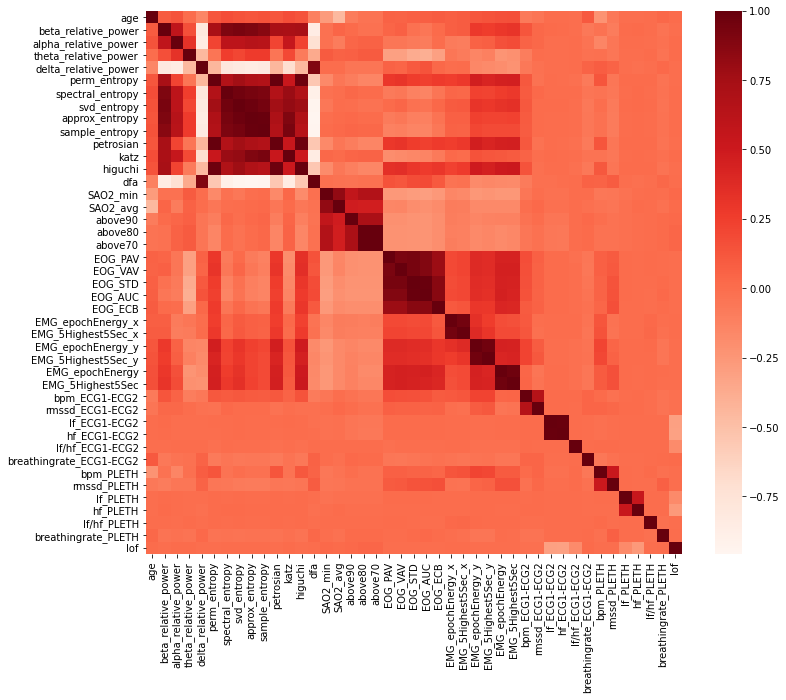

                Feature A             Feature B      Corr
50              petrosian          perm_entropy  0.999822
170               above70               above80  0.997975
44         sample_entropy        approx_entropy  0.989703
560          hf_ECG1-ECG2          lf_ECG1-ECG2  0.988914
252               EOG_AUC               EOG_STD  0.986746
76                higuchi             petrosian  0.974166
71                higuchi          perm_entropy  0.971782
35         approx_entropy           svd_entropy  0.970886
434      EMG_5Highest5Sec       EMG_epochEnergy  0.968907
377    EMG_5Highest5Sec_y     EMG_epochEnergy_y  0.958228
86                    dfa        approx_entropy  0.957961
27            svd_entropy      spectral_entropy  0.954423
324    EMG_5Highest5Sec_x     EMG_epochEnergy_x  0.950446
87                    dfa        sample_entropy  0.943353
43         sample_entropy           svd_entropy  0.941832
85                    dfa           svd_entropy  0.939872
34         app

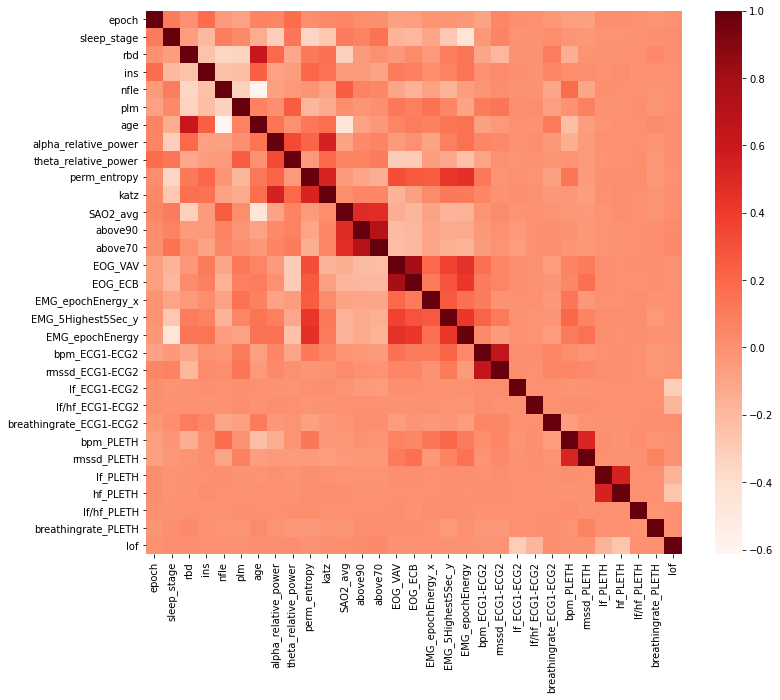

In [4]:
# Feature Removal Based on Between-Feature Correlation:

## INPUTS ##:
threshold = 0.8 # Abs correlation above which feature is removed

# 1. Calculate Correlation Matrix of the Predictors
columnsToCorr = list(final.columns)
safeFeatures = ['Patient', 'epoch', 'sleep_stage', 'rbd', 'ins', 'nfle', 'plm'] # Features that we won't remove
for i in safeFeatures:
    columnsToCorr.remove(i)

plt.figure(figsize=(12,10))
cor = final[columnsToCorr].corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

# 2. Determine the two predictors associated with the largest absolute pairwise correlation
# Remove (set = 0) half of the matrix because symmetric:
lowerTriangleMask = np.tril(np.ones(cor.shape), -1).astype(np.bool) # Create lower triangle mask
corLowerTriangle = cor.where(lowerTriangleMask)
corAbs = corLowerTriangle.abs() # Consider absolute correlation

# Build sorted dataframe of form: ["Feature A", "Feature B", corr]
pairwiseCorr = corAbs.stack().reset_index()
pairwiseCorr.columns = ['Feature A','Feature B','Corr']

# Isolate correlations to remove
pairwiseCorr = pairwiseCorr[pairwiseCorr['Corr'] > threshold]
pairwiseCorr.sort_values('Corr', ascending = False, inplace = True)
print(pairwiseCorr)

# 3. Determine the average correlation between A and B and every other feature:
# Create an average correlation dataframe of form [feature, averageCorr]
averageCorr = pd.DataFrame(cor.abs().mean(axis = 1), cor.index, ['avgCorr'])

# Loop through pairwiseCorr, make a list of features to remove. 
featuresToRemove = []
for index, row in pairwiseCorr.iterrows():
    featureA = row['Feature A']
    featureB = row['Feature B']
    featureA_avgCorr = averageCorr.loc[featureA, 'avgCorr']
    featureB_avgCorr = averageCorr.loc[featureB, 'avgCorr']

    # If A has larger average correlation, remove it. Otherwise, remove B
    if featureA_avgCorr >= featureB_avgCorr:
        if featureA not in featuresToRemove:
            featuresToRemove.append(featureA)
    else:
        if featureB not in featuresToRemove:
            featuresToRemove.append(featureB)

# Report results:
print("Threshold: " + str(threshold))
print(featuresToRemove)

# Dataset with features removed
correlationFeatureRemoval = final.drop(featuresToRemove, axis = 1)
print("Remaining Features: " + str(correlationFeatureRemoval.shape[1]))

# Show the correlation matrix after feature removal
plt.figure(figsize=(12,10))
cor2 = correlationFeatureRemoval.corr()
sns.heatmap(cor2, annot=False, cmap=plt.cm.Reds)
plt.show()
    

In [9]:
print(averageCorr)
print(averageCorr.loc["above70", "avgCorr"])

                          avgCorr
age                      0.133090
beta_relative_power      0.283011
alpha_relative_power     0.199149
theta_relative_power     0.171625
delta_relative_power     0.260308
perm_entropy             0.319942
spectral_entropy         0.283221
svd_entropy              0.297562
approx_entropy           0.290262
sample_entropy           0.286279
petrosian                0.320592
katz                     0.254763
higuchi                  0.327787
dfa                      0.280387
SAO2_min                 0.193503
SAO2_avg                 0.169503
above90                  0.156082
above80                  0.167013
above70                  0.166701
EOG_PAV                  0.247356
EOG_VAV                  0.247965
EOG_STD                  0.254188
EOG_AUC                  0.254286
EOG_ECB                  0.219625
EMG_epochEnergy_x        0.149580
EMG_5Highest5Sec_x       0.159408
EMG_epochEnergy_y        0.250094
EMG_5Highest5Sec_y       0.236725
EMG_epochEnerg

In [5]:
# Feature Selection with Mutual Information

info_selection = pd.concat([correlationFeatureRemoval['sleep_stage'], correlationFeatureRemoval.iloc[:, 9:]], axis=1)

safe_features = list(correlationFeatureRemoval.iloc[:, :9].columns)

info_scores = []

for x in info_selection.columns[1:]:
    score = metrics.normalized_mutual_info_score(info_selection['sleep_stage'], info_selection[x])
    column_and_score = (x, score)
    info_scores.append(column_and_score)
    
target_columnscore = pd.DataFrame(info_scores).sort_values(by=1, ascending = False)

top_5_cols = safe_features+list(target_columnscore[0][:5])
top_10_cols = safe_features+list(target_columnscore[0][:10])
top_20_cols = safe_features+list(target_columnscore[0][:20])
top_30_cols = safe_features+list(target_columnscore[0][:30])

top_5_data = correlationFeatureRemoval[top_5_cols]
top_10_data = correlationFeatureRemoval[top_10_cols]
top_20_data = correlationFeatureRemoval[top_20_cols]
top_30_data = correlationFeatureRemoval[top_30_cols]

print(target_columnscore)

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous 

                          0         1
0      alpha_relative_power  0.272477
8                   EOG_ECB  0.272477
2              perm_entropy  0.272477
1      theta_relative_power  0.272477
11          EMG_epochEnergy  0.272477
10       EMG_5Highest5Sec_y  0.272477
3                      katz  0.272477
9         EMG_epochEnergy_x  0.272469
23                      lof  0.272449
18              rmssd_PLETH  0.272423
20                 hf_PLETH  0.271954
17                bpm_PLETH  0.270637
13          rmssd_ECG1-ECG2  0.269829
21              lf/hf_PLETH  0.269726
19                 lf_PLETH  0.269435
7                   EOG_VAV  0.269390
12            bpm_ECG1-ECG2  0.266031
15          lf/hf_ECG1-ECG2  0.263938
14             lf_ECG1-ECG2  0.259300
16  breathingrate_ECG1-ECG2  0.141566
4                  SAO2_avg  0.092091
22      breathingrate_PLETH  0.071005
6                   above70  0.028453
5                   above90  0.021228


/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [6]:
# Get Clustering Metrics Using Cluster IDs Returned from a Clustering

def get_clustering_metrics(cluster_ids, target, simplifiedTarget = False):
    if simplifiedTarget:
        simplifiedTarget = []
        for i in target:
            if i >= 1.0 and i <= 4.0:
                simplifiedTarget.append(1.0)
            elif i == 5.0:
                simplifiedTarget.append(2.0)
            else:
                simplifiedTarget.append(0.0)
        target = np.array(simplifiedTarget)

    cms={}
#     predicted_labels = stage_for_cluster(cluster_ids, target)
    predicted_labels = cluster_ids
#     cms['NMI'] = metrics.normalized_mutual_info_score(target, predicted_labels)
    cms['F1'] = metrics.f1_score(target, predicted_labels, average = 'weighted')
#     cms['Homogeneity'] = metrics.homogeneity_score(target, predicted_labels)
#     cms['Rand Stat (Acc) (Best is 1)'] = metrics.adjusted_rand_score(target, predicted_labels)
#     cms['Fowlkes-Mallows (Best is 1)'] = metrics.fowlkes_mallows_score(target, predicted_labels)
    cms['Accuracy'] = metrics.accuracy_score(target, predicted_labels)
    
    metric_dict = pd.concat([pd.Series(cms.keys()), pd.Series(cms.values())], axis=1)
    metric_dict.columns = ['Metric', 'Score']
    return metric_dict
    

In [7]:
trainingDatainds = ['ins2', 'ins6', 'n11', 'n2', 'nfle10', 'nfle11', 'nfle12', 'nfle13', 'nfle14', 'nfle15', 
                'plm10', 'plm1', 'plm2', 'plm3', 'plm5', 'plm6', 'rbd10', 'rbd11', 'rbd12', 'rbd13', 'rbd16', 'rbd17']

testingDatainds = ['ins8', 'ins9', 'n3', 'n5', 'nfle16', 'nfle17', 'nfle18', 'nfle19', 'plm7', 'plm8', 'plm9', 
               'rbd18', 'rbd19', 'rbd20']


In [28]:
def postUndersampling(dataToUndersample, label, method = "ncr"):
    if method == 'ncr':
        ncr = NeighbourhoodCleaningRule()
        balancedDatapoints, balancedLabels = ncr.fit_resample(
            dataToUndersample,
            label
        )
    elif method == 'rand_ncr':
        rand = RandomUnderSampler(
            #sampling_strategy = dictOfCountOfEachStage # The stages to undersample.
        )
        balancedDatapoints, balancedLabels = rand.fit_resample(
            thisPatientData[allNumericCols].to_numpy(),
            thisPatientData['sleep_stage'].astype(str)
        )

        ncr = NeighbourhoodCleaningRule()
        balancedDatapoints, balancedLabels = ncr.fit_resample(
            balancedDatapoints,
            balancedLabels.astype(float)
        )
    elif method == 'rand':
        rand = RandomUnderSampler(
            #sampling_strategy = dictOfCountOfEachStage # The stages to undersample.
        )
        balancedDatapoints, balancedLabels = rand.fit_resample(
            thisPatientData[allNumericCols].to_numpy(),
            thisPatientData['sleep_stage'].astype(str)
        )
        
    return balancedDatapoints, balancedLabels


def postOversampling(dataToOversample, label):
    smote = SMOTE(sampling_strategy = 'not majority')

    balancedDatapoints, balancedLabels = smote.fit_resample(
        dataToOversample,
        label
    )

    return balancedDatapoints, balancedLabels

In [9]:
# Function for running PCA or TSNE or Isomap
def dimReduction(dataToReduce, type = "PCA", n_components = 2, perplexity = 30, n_iters = 1000, simplifiedTarget = False):
    data = dataToReduce.iloc[:,8:].to_numpy()
    target = dataToReduce.loc[:, "sleep_stage"].to_numpy()
    if type == "PCA":
        model = PCA(n_components = n_components)
        data_reduced = model.fit_transform(data)
    elif type == "TSNE":
        model = TSNE(n_components = n_components, perplexity = perplexity, n_iter = n_iters)
        data_reduced = model.fit_transform(data)
    elif type == "Isomap":
        # Isomap:
        model = manifold.Isomap(n_neighbors = 12, n_components = n_components)
        model.fit(data)
        data_reduced = model.transform(data)

    if simplifiedTarget:
        simplifiedTarget = []
        for i in target:
            if i >= 1.0 and i <= 4.0:
                simplifiedTarget.append(1.0)
            elif i == 5.0:
                simplifiedTarget.append(2.0)
            else:
                simplifiedTarget.append(0.0)
        target = np.array(simplifiedTarget)

    return data_reduced, target

In [10]:
# Function for Plotting PSA, TSNE, or Clusters:
def plot_dimReduction(dataToPlot, label, label_meaning = "target", scaleFactors = [1, 1, 1], eliv = None, azim = None):
    cols = np.shape(dataToPlot)[1]
    if cols == 1:
        # 1D Plot
        #sf = 10**49
        sf = scaleFactors[0]
        df_reduced = pd.DataFrame(dataToPlot / sf, columns=["pca_feature_1"])
        df_reduced[label_meaning] = label

        # Creating dataset
        np.random.seed(10)
        
        data_0 = df_reduced.loc[df_reduced[label_meaning] == 0, "pca_feature_1"]
        data_1 = df_reduced.loc[df_reduced[label_meaning] == 1, "pca_feature_1"]
        data_2 = df_reduced.loc[df_reduced[label_meaning] == 2, "pca_feature_1"]
        data_3 = df_reduced.loc[df_reduced[label_meaning] == 3, "pca_feature_1"]
        data_4 = df_reduced.loc[df_reduced[label_meaning] == 4, "pca_feature_1"]
        data_5 = df_reduced.loc[df_reduced[label_meaning] == 5, "pca_feature_1"]
        data = [data_0, data_1, data_2, data_3, data_4, data_5]
        
        fig = plt.figure(figsize=(10,5))
        
        # Configure axes
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
        plt.xlabel("sleep_stage")
        plt.ylabel("feature_1")
        
        # Creating plot (handles outliers)
        bp = ax.boxplot(data, showfliers=False)  

        # show plot
        plt.show()

    elif cols == 2:
        # Dataframe
        df_reduced = pd.DataFrame(dataToPlot, columns=["feature_1", "feature_2"])
        df_reduced[label_meaning] = label

        # Outlier Removal
        original_rows = len(df_reduced)
        df_reduced = df_reduced[(np.abs(stats.zscore(df_reduced)) < 3.5).all(axis=1)]
        print("Number of Outliers Removed: " + str(original_rows - len(df_reduced)))

        # Optional Code to Correctly Scale/Reduce
        #df_reduced = df_reduced[df_reduced["feature_1"] < 0]

        # 2D Plot
        fig = plt.figure(figsize=(10,10))
        sns.scatterplot(data=df_reduced, x="feature_1", y="feature_2", hue=label_meaning, palette="deep")

        fig.show()

    elif cols == 3:
        # Dataframe
        df_reduced = pd.DataFrame(dataToPlot, columns=["feature_1", "feature_2", "feature_3"])
        df_reduced[label_meaning] = label
        # Outlier Removal
        original_rows = len(df_reduced)
        df_reduced = df_reduced[(np.abs(stats.zscore(df_reduced)) < 3.5).all(axis=1)]
        print("Number of Outliers Removed: " + str(original_rows - len(df_reduced)))

        # Optional Scaling Factor
        #sf_x = 10**45
        sf_x = scaleFactors[0]
        sf_y = scaleFactors[1]
        sf_z = scaleFactors[2]

        # 3D Plot
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection = '3d')
        cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
        sc = ax.scatter(xs=df_reduced["feature_1"] / sf_x, ys=df_reduced["feature_2"] / sf_y, zs=df_reduced["feature_3"] / sf_z, c=df_reduced[label_meaning], cmap=cmap)
        if eliv and azim:
            ax.view_init(eliv, azim)

        # Axes
        ax.set_xlabel('feature_1')
        ax.set_ylabel('feature_2')
        ax.set_zlabel('feature_3')

        # Legend
        plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

        # Optional Scaling
        # plt.xlim([-1.2554, -1.2548])

        plt.show()
        
        

In [18]:
# # Tuning TSNE:
# for perplex in range(30, 55, 5):
#     n_components = 2 # Set this param here. It's used in the DBSCAN function
#     data_reduced, target = dimReduction(top_10_data, type = "TSNE", n_components = n_components, perplexity = perplex, simplifiedTarget = True)
#     plot_dimReduction(data_reduced, target, label_meaning = "Target", scaleFactors = [1, 1, 1])
    

/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Ashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-29-306cdc5a73f6>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  reduced_train = reduced[[top_5_data['Patient'].isin(trainingDatainds)]]
<ipython-input-29-306cdc5a73f6>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `

Number of Outliers Removed: 0
Number of Outliers Removed: 0


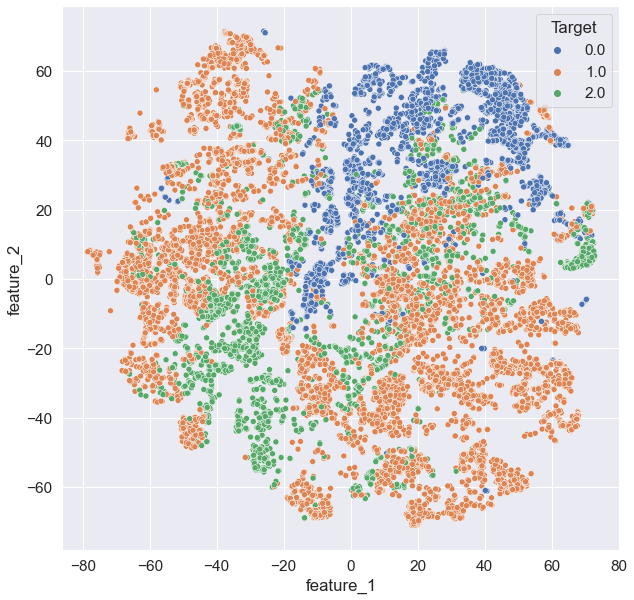

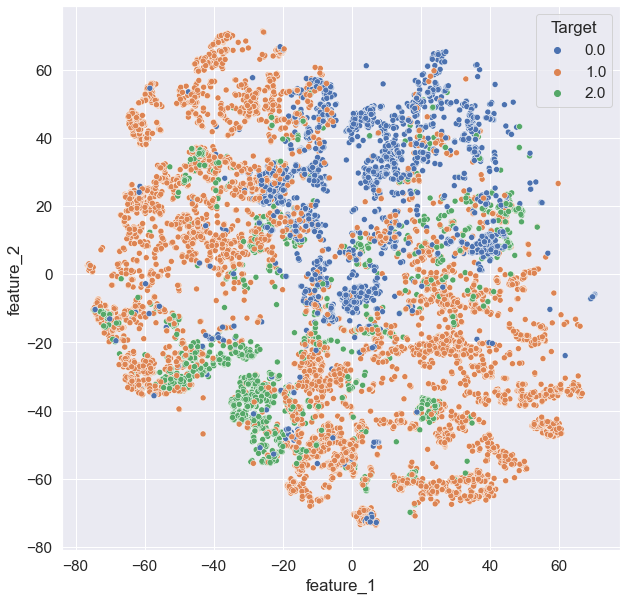

In [29]:
# reduced, reduced_target = dimReduction(top_10_data, type = 'PCA', n_components = 5, simplifiedTarget = True)
# reduced_train = reduced[[top_10_data['Patient'].isin(trainingDatainds)]][:,2:]
# reduced_train_target = reduced_target[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_train, reduced_train_target = postUndersampling(reduced_train, reduced_train_target)
# reduced_train, reduced_train_target = postOversampling(reduced_train, reduced_train_target)
# reduced_test = reduced[[top_10_data['Patient'].isin(testingDatainds)]][:,2:]
# reduced_test_target = reduced_target[[top_10_data['Patient'].isin(testingDatainds)]]
# reduced_test, reduced_test_target = postUndersampling(reduced_test, reduced_test_target)
# reduced_test, reduced_test_target = postOversampling(reduced_test, reduced_test_target)

reduced, reduced_target = dimReduction(top_5_data, type = 'TSNE', n_components = 2, perplexity = 30, simplifiedTarget = True)
reduced_train = reduced[[top_5_data['Patient'].isin(trainingDatainds)]]
reduced_train_target = reduced_target[[top_5_data['Patient'].isin(trainingDatainds)]]
reduced_train, reduced_train_target = postUndersampling(reduced_train, reduced_train_target)
# reduced_train, reduced_train_target = postOversampling(reduced_train, reduced_train_target)
reduced_test = reduced[[top_5_data['Patient'].isin(testingDatainds)]]
reduced_test_target = reduced_target[[top_5_data['Patient'].isin(testingDatainds)]]

# reduced, reduced_target = dimReduction(top_10_data, type = 'Isomap', n_components = 3, simplifiedTarget = True)
# reduced_train = reduced[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_train_target = reduced_target[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_test = reduced[[top_10_data['Patient'].isin(testingDatainds)]]
# reduced_test_target = reduced_target[[top_10_data['Patient'].isin(testingDatainds)]]

plot_dimReduction(reduced_train, reduced_train_target, label_meaning = "Target", scaleFactors = [1, 1, 1])
plot_dimReduction(reduced_test, reduced_test_target, label_meaning = "Target", scaleFactors = [1, 1, 1])


In [17]:
# normals = top_5_data[top_5_data['Patient'].isin(['n11', 'n2', 'n3', 'n5'])]

# reduced_normal, reduced_normal_target = dimReduction(normals, type = 'TSNE', n_components = 2, perplexity = 30, simplifiedTarget = True)
# normal_train = reduced_normal[[normals['Patient'].isin(trainingDatainds)]]
# normal_train_target = reduced_normal_target[[normals['Patient'].isin(trainingDatainds)]]
# normal_test = reduced_normal[[normals['Patient'].isin(testingDatainds)]]
# normal_test_target = reduced_normal_target[[normals['Patient'].isin(testingDatainds)]]

# plot_dimReduction(normal_train, normal_train_target, label_meaning = "Target", scaleFactors = [1, 1, 1])
# plot_dimReduction(normal_test, normal_test_target, label_meaning = "Target", scaleFactors = [1, 1, 1])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

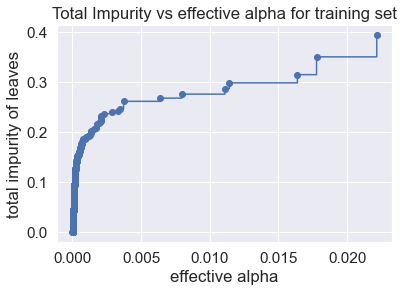

In [30]:
clf = sk.tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(reduced_train, reduced_train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

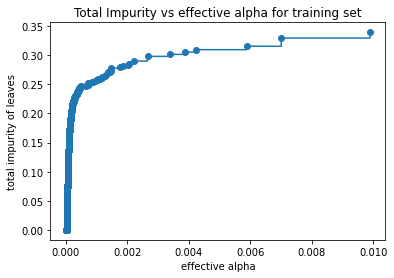

In [13]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[ccp_alphas <= 0.01], impurities[ccp_alphas <= 0.01], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

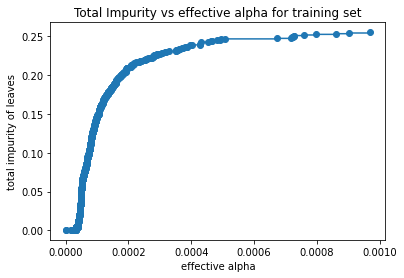

In [14]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[ccp_alphas <= 0.001], impurities[ccp_alphas <= 0.001], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

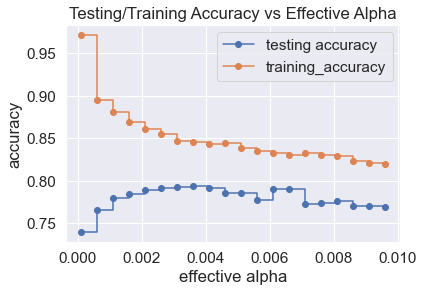

In [33]:
testing_accuracies = []

training_accuracies = []

alpha_fields = np.array([i for i in range(1, 100, 5)])/10000

for i in alpha_fields:
    rf = sk.ensemble.RandomForestClassifier(ccp_alpha = i)
    rf_trained = rf.fit(reduced_train, reduced_train_target)
    predicted_stages_train = rf_trained.predict(reduced_train)
    predicted_stages_test = rf_trained.predict(reduced_test)
    train_acc = metrics.accuracy_score(reduced_train_target, predicted_stages_train)
    training_accuracies.append(train_acc)
    test_acc = metrics.accuracy_score(reduced_test_target, predicted_stages_test)
    testing_accuracies.append(test_acc)
    
testing_accuracies = np.array(testing_accuracies)
training_accuracies = np.array(training_accuracies)
    
fig, ax = plt.subplots()
ax.plot(alpha_fields, testing_accuracies, marker="o", drawstyle="steps-post")
ax.plot(alpha_fields, training_accuracies, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("accuracy")
ax.set_title("Testing/Training Accuracy vs Effective Alpha")
ax.legend(['testing accuracy', 'training_accuracy'])

     Metric     Score
0        F1  0.774253
1  Accuracy  0.791762


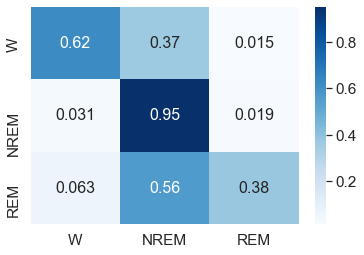

Number of Outliers Removed: 0


<ipython-input-10-ac8dce549690>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


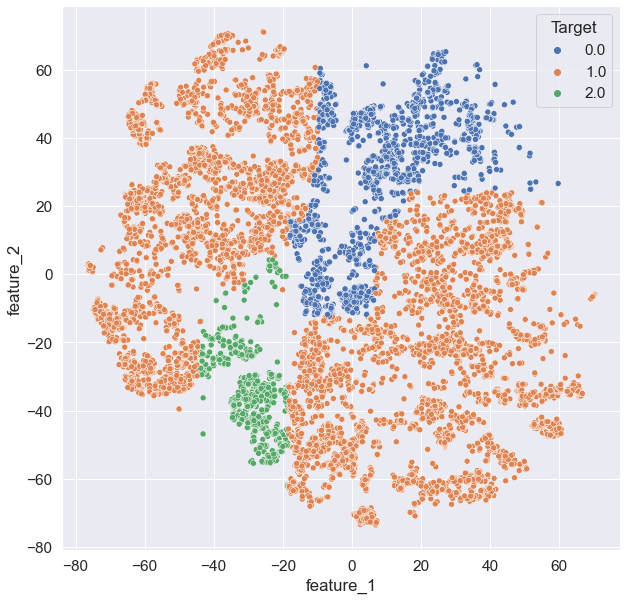

In [34]:
# All individuals

rf = sk.ensemble.RandomForestClassifier(n_estimators = 100, ccp_alpha = 0.0035)
rf_trained = rf.fit(reduced_train, reduced_train_target)
predicted_stages = rf_trained.predict(reduced_test)

print(get_clustering_metrics(predicted_stages, reduced_test_target))

conf = metrics.confusion_matrix(reduced_test_target, predicted_stages)
ind_accs = conf/(conf.sum(axis=1, keepdims=True))

df_cm = pd.DataFrame(ind_accs, index = ['W', 'NREM', 'REM'], columns = ['W', 'NREM', 'REM'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.show()

plot_dimReduction(reduced_test, predicted_stages, label_meaning = "Target", scaleFactors = [1, 1, 1])

# Normal individuals

# rf_trained = rf.fit(normal_train, normal_train_target)
# predicted_stages = rf_trained.predict(normal_test)

# print(get_clustering_metrics(predicted_stages, normal_test_target))

# conf = metrics.confusion_matrix(normal_test_target, predicted_stages)
# ind_accs = conf/(conf.sum(axis=1, keepdims=True))

# df_cm = pd.DataFrame(ind_accs, index = ['W', 'NREM', 'REM'], columns = ['W', 'NREM', 'REM'])
# # plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
# plt.show()

# plot_dimReduction(normal_test, predicted_stages, label_meaning = "Target", scaleFactors = [1, 1, 1])



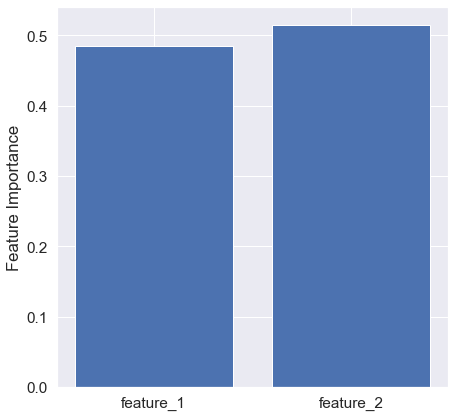

In [32]:
plt.figure(figsize=(7,7))
plt.bar(['feature_1', 'feature_2'], height=rf_trained.feature_importances_)
plt.ylabel('Feature Importance')
plt.show()

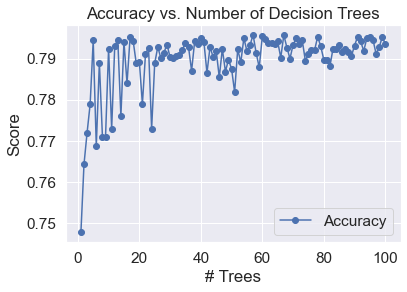

In [44]:
# acc_scores = []

for i in range(81, 101):
    rf = sk.ensemble.RandomForestClassifier(n_estimators = i, ccp_alpha = 0.0035)
    rf_trained = rf.fit(reduced_train, reduced_train_target)
    predicted_stages = rf_trained.predict(reduced_test)
    acc_scores.append(get_clustering_metrics(predicted_stages, reduced_test_target).iloc[1, 1])
    
fig, ax = plt.subplots()
ax.plot([i for i in range(1,101)], acc_scores, marker="o")
ax.set_xlabel("# Trees")
ax.set_ylabel("Score")
ax.set_title("Accuracy vs. Number of Decision Trees")
ax.legend(['Accuracy'])

<ipython-input-139-5c89eea582ae>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  reduced_train_a = reduced_a[[top_5_data['Patient'].isin(trainingDatainds)]]
<ipython-input-139-5c89eea582ae>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  reduced_train_target_a = reduced_target_a[[top_5_data['Patient'].isin(trainingDatainds)]]
<ipython-input-139-5c89eea582ae>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an 

Number of Outliers Removed: 0
Number of Outliers Removed: 0


<ipython-input-8-ac8dce549690>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


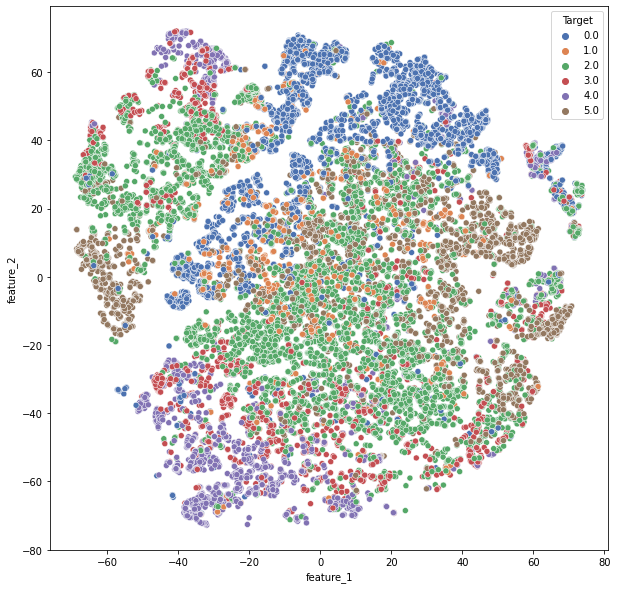

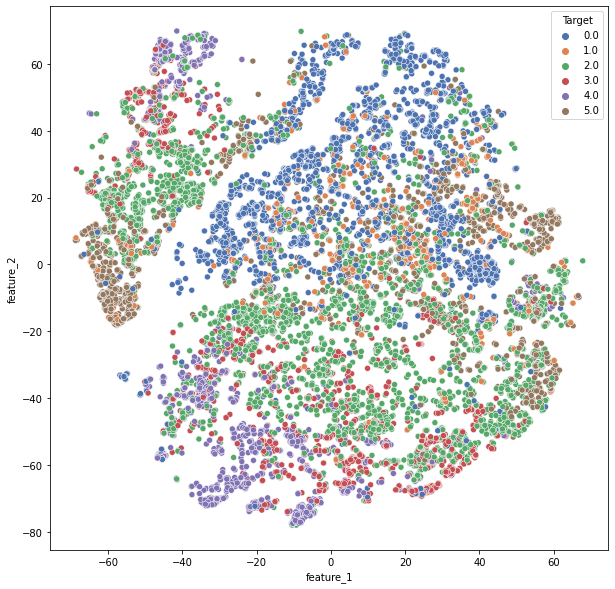

In [139]:
# reduced, reduced_target = dimReduction(top_10_data, type = 'PCA', n_components = 3, simplifiedTarget = True)
# reduced_train = reduced[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_train_target = reduced_target[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_test = reduced[[top_10_data['Patient'].isin(testingDatainds)]]
# reduced_test_target = reduced_target[[top_10_data['Patient'].isin(testingDatainds)]]

reduced_a, reduced_target_a = dimReduction(top_5_data, type = 'TSNE', n_components = 2, perplexity = 30, simplifiedTarget = False)
reduced_train_a = reduced_a[[top_5_data['Patient'].isin(trainingDatainds)]]
reduced_train_target_a = reduced_target_a[[top_5_data['Patient'].isin(trainingDatainds)]]
reduced_test_a = reduced_a[[top_5_data['Patient'].isin(testingDatainds)]]
reduced_test_target_a = reduced_target_a[[top_5_data['Patient'].isin(testingDatainds)]]

# reduced, reduced_target = dimReduction(top_10_data, type = 'Isomap', n_components = 3, simplifiedTarget = True)
# reduced_train = reduced[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_train_target = reduced_target[[top_10_data['Patient'].isin(trainingDatainds)]]
# reduced_test = reduced[[top_10_data['Patient'].isin(testingDatainds)]]
# reduced_test_target = reduced_target[[top_10_data['Patient'].isin(testingDatainds)]]

plot_dimReduction(reduced_train_a, reduced_train_target_a, label_meaning = "Target", scaleFactors = [1, 1, 1])
plot_dimReduction(reduced_test_a, reduced_test_target_a, label_meaning = "Target", scaleFactors = [1, 1, 1])

<ipython-input-151-3c4ae5fb5d2e>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  normal_train_a = reduced_normal_a[[normals['Patient'].isin(trainingDatainds)]]
<ipython-input-151-3c4ae5fb5d2e>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  normal_train_target_a = reduced_normal_target_a[[normals['Patient'].isin(trainingDatainds)]]
<ipython-input-151-3c4ae5fb5d2e>:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

Number of Outliers Removed: 0
Number of Outliers Removed: 0


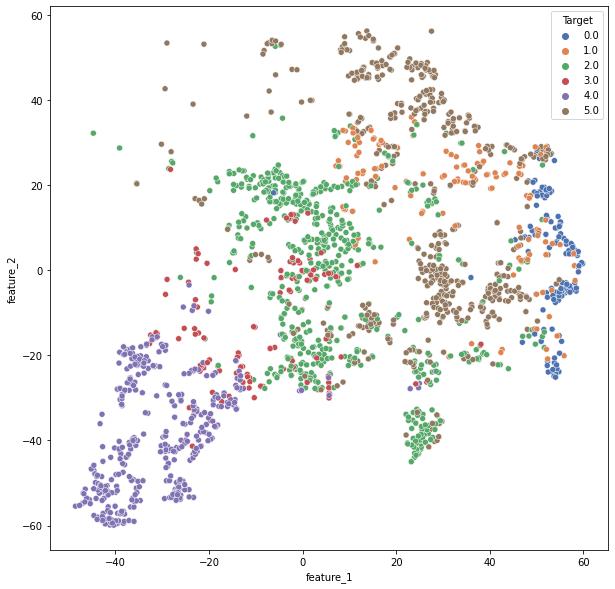

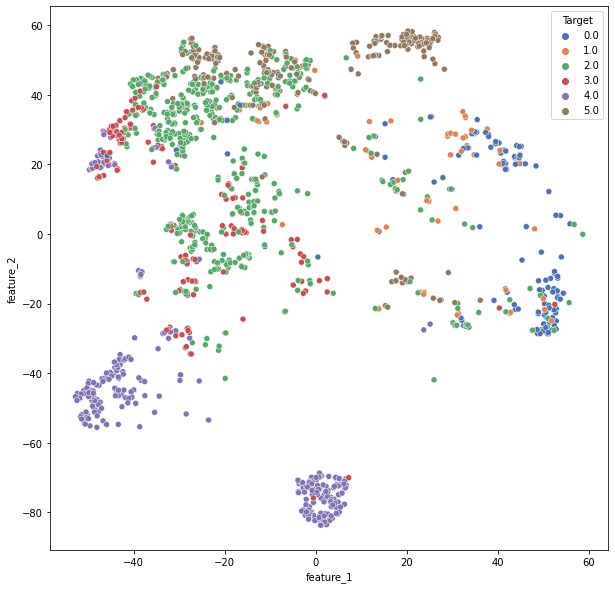

In [151]:
normals = top_5_data[top_5_data['Patient'].isin(['n11', 'n2', 'n3', 'n5'])]

reduced_normal_a, reduced_normal_target_a = dimReduction(normals, type = 'TSNE', n_components = 2, perplexity = 30, simplifiedTarget = False)
normal_train_a = reduced_normal_a[[normals['Patient'].isin(trainingDatainds)]]
normal_train_target_a = reduced_normal_target_a[[normals['Patient'].isin(trainingDatainds)]]
normal_test_a = reduced_normal_a[[normals['Patient'].isin(testingDatainds)]]
normal_test_target_a = reduced_normal_target_a[[normals['Patient'].isin(testingDatainds)]]

plot_dimReduction(normal_train_a, normal_train_target_a, label_meaning = "Target", scaleFactors = [1, 1, 1])
plot_dimReduction(normal_test_a, normal_test_target_a, label_meaning = "Target", scaleFactors = [1, 1, 1])

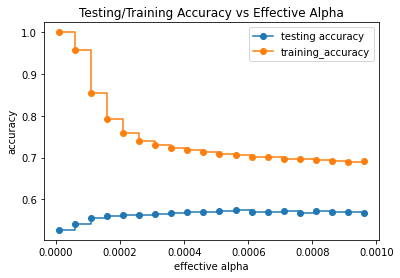

In [143]:
testing_accuracies = []

training_accuracies = []

alpha_fields = np.array([i for i in range(1, 100, 5)])/100000

for i in alpha_fields:
    rf = sk.ensemble.RandomForestClassifier(ccp_alpha = i)
    rf_trained = rf.fit(reduced_train_a, reduced_train_target_a)
    predicted_stages_train = rf_trained.predict(reduced_train_a)
    predicted_stages_test = rf_trained.predict(reduced_test_a)
    train_acc = metrics.accuracy_score(reduced_train_target_a, predicted_stages_train)
    training_accuracies.append(train_acc)
    test_acc = metrics.accuracy_score(reduced_test_target_a, predicted_stages_test)
    testing_accuracies.append(test_acc)
    
testing_accuracies = np.array(testing_accuracies)
training_accuracies = np.array(training_accuracies)
    
fig, ax = plt.subplots()
ax.plot(alpha_fields, testing_accuracies, marker="o", drawstyle="steps-post")
ax.plot(alpha_fields, training_accuracies, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("accuracy")
ax.set_title("Testing/Training Accuracy vs Effective Alpha")
ax.legend(['testing accuracy', 'training_accuracy'])

     Metric     Score
0        F1  0.540416
1  Accuracy  0.562028


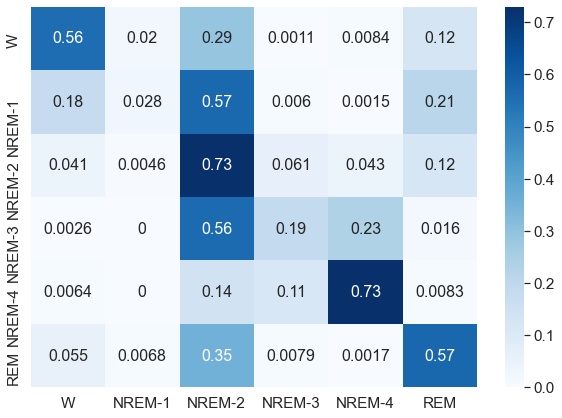

Number of Outliers Removed: 0


<ipython-input-8-ac8dce549690>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


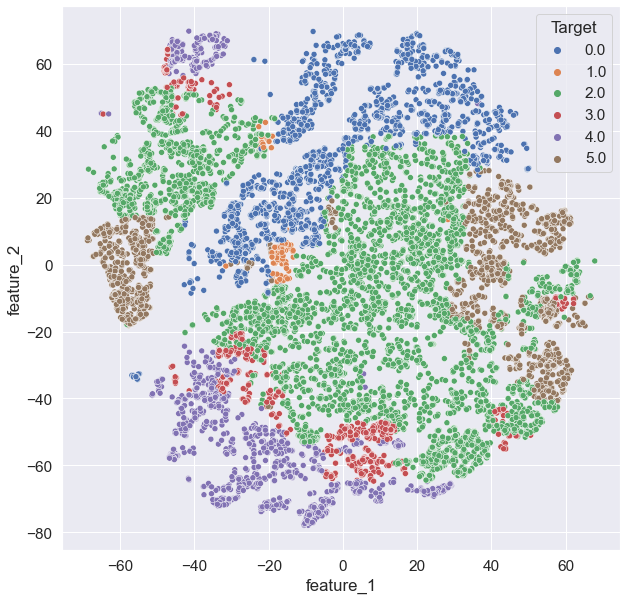

In [215]:
# All individuals

rf = sk.ensemble.RandomForestClassifier(n_estimators = 5, ccp_alpha = 0.0004)
rf_trained = rf.fit(reduced_train_a, reduced_train_target_a)
predicted_stages = rf_trained.predict(reduced_test_a)

print(get_clustering_metrics(predicted_stages, reduced_test_target_a))

conf = metrics.confusion_matrix(reduced_test_target_a, predicted_stages)
ind_accs = conf/(conf.sum(axis=1, keepdims=True))

df_cm = pd.DataFrame(ind_accs, index = ['W', 'NREM-1', 'NREM-2', 'NREM-3', 'NREM-4', 'REM'], 
                     columns = ['W', 'NREM-1', 'NREM-2', 'NREM-3', 'NREM-4', 'REM'])
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.show()

plot_dimReduction(reduced_test_a, predicted_stages, label_meaning = "Target", scaleFactors = [1, 1, 1])

# Normal individuals

# rf_trained = rf.fit(normal_train_a, normal_train_target_a)
# predicted_stages = rf_trained.predict(normal_test_a)

# print(get_clustering_metrics(predicted_stages, normal_test_target_a))

# conf = metrics.confusion_matrix(normal_test_target_a, predicted_stages)
# ind_accs = conf/(conf.sum(axis=1, keepdims=True))

# df_cm = pd.DataFrame(ind_accs, index = ['W', 'NREM-1', 'NREM-2', 'NREM-3', 'NREM-4', 'REM'], 
#                      columns = ['W', 'NREM-1', 'NREM-2', 'NREM-3', 'NREM-4', 'REM'])
# # plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
# plt.show()

# plot_dimReduction(normal_test_a, predicted_stages, label_meaning = "Target", scaleFactors = [1, 1, 1])

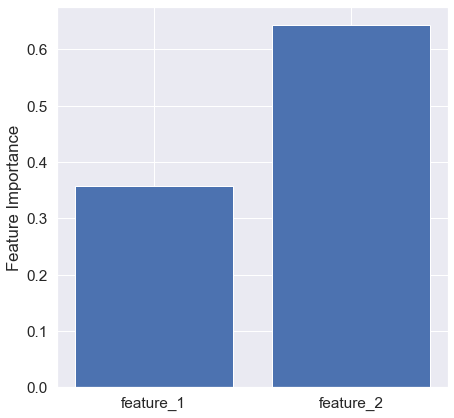

In [192]:
plt.figure(figsize=(7,7))
plt.bar(['feature_1', 'feature_2'], height=rf_trained.feature_importances_)
plt.ylabel('Feature Importance')
plt.show()

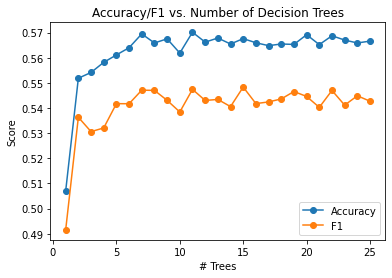

In [146]:
acc_scores = []
f1_scores = []

for i in range(1, 26):
    rf = sk.ensemble.RandomForestClassifier(n_estimators = i, ccp_alpha = 0.0004)
    rf_trained = rf.fit(reduced_train_a, reduced_train_target_a)
    predicted_stages = rf_trained.predict(reduced_test_a)
    acc_scores.append(get_clustering_metrics(predicted_stages, reduced_test_target_a).iloc[1, 1])
    f1_scores.append(get_clustering_metrics(predicted_stages, reduced_test_target_a).iloc[0, 1])

fig, ax = plt.subplots()
ax.plot([i for i in range(1,26)], acc_scores, marker="o")
ax.plot([i for i in range(1,26)], f1_scores, marker="o")
ax.set_xlabel("# Trees")
ax.set_ylabel("Score")
ax.set_title("Accuracy/F1 vs. Number of Decision Trees")
ax.legend(['Accuracy', 'F1'])